In [94]:
# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', UserWarning)
from datetime import date

First, let's add the data:

In [95]:
heightweight = Table().with_columns([
    'Date',        ['07/28/2017', '08/07/2017', '08/25/2017', '09/25/2017', '11/28/2017', '01/26/2018', '04/27/2018', '07/30/2018'],
    'Height (cm)', [        53.3,         54.6,         55.9,           61,         63.5,         67.3,         71.1,         74.9],
    'Weight (kg)', [       4.204,         4.65,        5.425,         6.41,        7.985,        9.125,        10.39,       10.785],
                                    ])
heightweight

Date,Height (cm),Weight (kg)
07/28/2017,53.3,4.204
08/07/2017,54.6,4.65
08/25/2017,55.9,5.425
09/25/2017,61,6.41
11/28/2017,63.5,7.985
01/26/2018,67.3,9.125
04/27/2018,71.1,10.39
07/30/2018,74.9,10.785


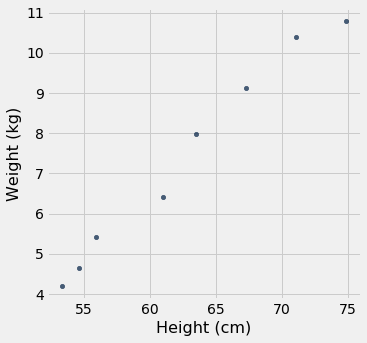

In [96]:
heightweight.scatter('Height (cm)', 'Weight (kg)')

In [97]:
def standard_units(nums):
    return (nums - np.mean(nums)) / np.std(nums)

heightweight_standard = Table().with_columns(
    "Height (standard units)", standard_units(heightweight.column('Height (cm)')),
    "Weight (standard units)", standard_units(heightweight.column('Weight (kg)')))
heightweight_standard

Height (standard units),Weight (standard units)
-1.26135,-1.3158
-1.08691,-1.13054
-0.912464,-0.808628
-0.228116,-0.399485
0.107349,0.254728
0.617255,0.728253
1.12716,1.2537
1.63707,1.41777


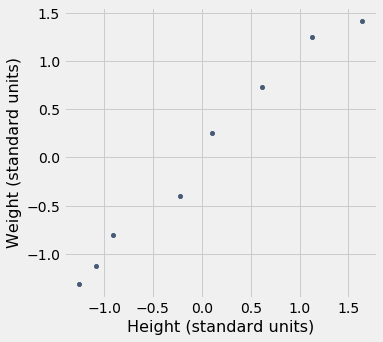

In [122]:
heightweight_standard.scatter('Height (standard units)', 'Weight (standard units)')

In [118]:
heightweight_product = heightweight_standard.with_column(
    'Product of standard units',
    heightweight_standard.column('Height (standard units)') * heightweight_standard.column('Weight (standard units)'))
r = np.mean(heightweight_product.column('Product of standard units'))
r

0.9910523777994954

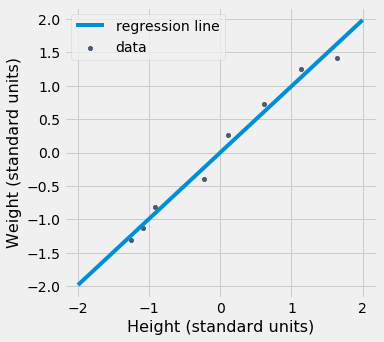

In [119]:
def plot_data_and_line(dataset, x, y, point_0, point_1):
    """Makes a scatter plot of the dataset, along with a line passing through two points."""
    dataset.scatter(x, y, label="data")
    xs, ys = zip(point_0, point_1)
    plots.plot(xs, ys, label="regression line")
    plots.legend()

plot_data_and_line(heightweight_standard, 
                   "Height (standard units)", 
                   "Weight (standard units)", 
                   [-2, -2*r], 
                   [2, 2*r])

In [100]:
heightweight = heightweight.with_columns(
   "Date",
    [datetime.strptime(date, "%m/%d/%Y").date() for date in heightweight.column(0)])
heightweight

Date,Height (cm),Weight (kg)
2017-07-28,53.3,4.204
2017-08-07,54.6,4.65
2017-08-25,55.9,5.425
2017-09-25,61,6.41
2017-11-28,63.5,7.985
2018-01-26,67.3,9.125
2018-04-27,71.1,10.39
2018-07-30,74.9,10.785


In [109]:
birthday = date(2017,7,24)
days_since_birth = [(date - birthday).days for date in heightweight.column('Date')]
heightweight_with_days = heightweight.with_columns("Days Since Birth", days_since_birth)
heightweight_with_days

Date,Height (cm),Weight (kg),Days Since Birth
2017-07-28,53.3,4.204,4
2017-08-07,54.6,4.65,14
2017-08-25,55.9,5.425,32
2017-09-25,61,6.41,63
2017-11-28,63.5,7.985,127
2018-01-26,67.3,9.125,186
2018-04-27,71.1,10.39,277
2018-07-30,74.9,10.785,371


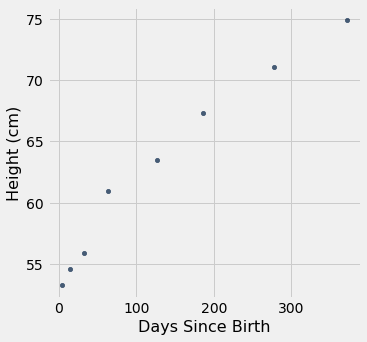

In [113]:
heightweight_with_days.scatter('Days Since Birth', 'Height (cm)')

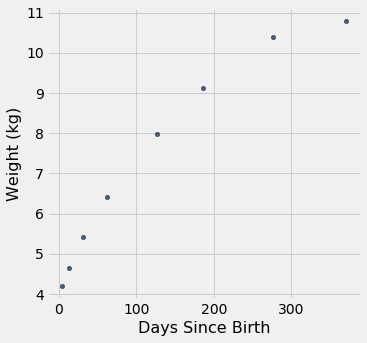

In [112]:
heightweight_with_days.scatter('Days Since Birth', 'Weight (kg)')